In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Wczytywanie danych

In [3]:
co2 = pd.read_csv(r"C:\Programowanie\Jupyter\data\co2-emissions-transport.csv")

In [4]:
co2PerCap = pd.read_csv(r"C:\Programowanie\Jupyter\data\per-capita-co2-transport.csv")

## Sprawdzenie zawartości tabel

In [5]:
co2.head()

,Entity,Code,Year,Transport
0,Afghanistan,AFG,1990,1.670000e+06
1,Afghanistan,AFG,1991,1.550000e+06
2,Afghanistan,AFG,1992,7.700000e+05
3,Afghanistan,AFG,1993,7.400000e+05
4,Afghanistan,AFG,1994,7.100000e+05


In [6]:
co2PerCap.head(10)

,Entity,Code,Year,Transport (per capita)
0,Afghanistan,AFG,1990,0.134544
1,Afghanistan,AFG,1991,0.116550
2,Afghanistan,AFG,1992,0.053156
3,Afghanistan,AFG,1993,0.046786
4,Afghanistan,AFG,1994,0.041579
5,Afghanistan,AFG,1995,0.037547
6,Afghanistan,AFG,1996,0.033946
7,Afghanistan,AFG,1997,0.030480
8,Afghanistan,AFG,1998,0.027865
9,Afghanistan,AFG,1999,0.017352


## Przygotowanie danych po importcie

In [7]:
co2.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Entity     5995 non-null   object 
 1   Code       5665 non-null   object 
 2   Year       5995 non-null   int64  
 3   Transport  5995 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 821.5 KB


In [8]:
co2[co2["Code"].isnull() == True]

,Entity,Code,Year,Transport
30,Africa,NaN,1990,1.092700e+08
31,Africa,NaN,1991,1.145800e+08
32,Africa,NaN,1992,1.205900e+08
33,Africa,NaN,1993,1.196600e+08
34,Africa,NaN,1994,1.212600e+08
...,...,...,...,...
5720,Upper-middle-income countries,NaN,2015,1.966180e+09
5721,Upper-middle-income countries,NaN,2016,2.010550e+09
5722,Upper-middle-income countries,NaN,2017,2.067900e+09
5723,Upper-middle-income countries,NaN,2018,2.106700e+09


In [9]:
co2["Entity"] = co2["Entity"].astype("category")
co2["Code"] = co2["Code"].astype("category")
co2["Transport"] = round(co2["Transport"], 2)

In [10]:
co2.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Entity     5995 non-null   category
 1   Code       5665 non-null   category
 2   Year       5995 non-null   int64   
 3   Transport  5995 non-null   float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 153.6 KB


In [11]:
co2.head()

,Entity,Code,Year,Transport
0,Afghanistan,AFG,1990,1669999.96
1,Afghanistan,AFG,1991,1549999.95
2,Afghanistan,AFG,1992,769999.98
3,Afghanistan,AFG,1993,740000.01
4,Afghanistan,AFG,1994,709999.98


In [12]:
co2PerCap.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  5995 non-null   object 
 1   Code                    5665 non-null   object 
 2   Year                    5995 non-null   int64  
 3   Transport (per capita)  5995 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 821.5 KB


In [13]:
co2PerCap[co2PerCap["Code"].isnull() == True]

,Entity,Code,Year,Transport (per capita)
30,Africa,NaN,1990,0.173348
31,Africa,NaN,1991,0.177000
32,Africa,NaN,1992,0.181472
33,Africa,NaN,1993,0.175488
34,Africa,NaN,1994,0.173366
...,...,...,...,...
5720,Upper-middle-income countries,NaN,2015,0.795126
5721,Upper-middle-income countries,NaN,2016,0.807197
5722,Upper-middle-income countries,NaN,2017,0.824414
5723,Upper-middle-income countries,NaN,2018,0.834285


In [14]:
co2PerCap["Entity"] = co2PerCap["Entity"].astype("category")
co2PerCap["Code"] = co2PerCap["Code"].astype("category")
co2PerCap["Transport (per capita)"] = round(co2PerCap["Transport (per capita)"], 2)

In [15]:
co2PerCap.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Entity                  5995 non-null   category
 1   Code                    5665 non-null   category
 2   Year                    5995 non-null   int64   
 3   Transport (per capita)  5995 non-null   float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 153.6 KB


## Łączenie dwóch tabel - .merge

In [16]:
len(co2)

5995

In [17]:
len(co2PerCap)

5995

In [18]:
co2.reset_index(inplace=True)

In [19]:
co2.set_index("index", inplace=True)

In [20]:
co2.head()

,Entity,Code,Year,Transport
index,,,,
0,Afghanistan,AFG,1990,1669999.96
1,Afghanistan,AFG,1991,1549999.95
2,Afghanistan,AFG,1992,769999.98
3,Afghanistan,AFG,1993,740000.01
4,Afghanistan,AFG,1994,709999.98


In [21]:
co2PerCap.reset_index(inplace=True)

In [22]:
co2PerCap.set_index("index", inplace=True)

In [23]:
co2PerCap.head()

,Entity,Code,Year,Transport (per capita)
index,,,,
0,Afghanistan,AFG,1990,0.13
1,Afghanistan,AFG,1991,0.12
2,Afghanistan,AFG,1992,0.05
3,Afghanistan,AFG,1993,0.05
4,Afghanistan,AFG,1994,0.04


In [24]:
co2Merge = co2.merge(co2PerCap, on=['index', 'Entity', 'Code', 'Year'])

In [25]:
co2Merge.head(10)

,Entity,Code,Year,Transport,Transport (per capita)
index,,,,,
0,Afghanistan,AFG,1990,1669999.96,0.13
1,Afghanistan,AFG,1991,1549999.95,0.12
2,Afghanistan,AFG,1992,769999.98,0.05
3,Afghanistan,AFG,1993,740000.01,0.05
4,Afghanistan,AFG,1994,709999.98,0.04
5,Afghanistan,AFG,1995,680000.01,0.04
6,Afghanistan,AFG,1996,639999.99,0.03
7,Afghanistan,AFG,1997,589999.97,0.03
8,Afghanistan,AFG,1998,550000.01,0.03


### Usunięcie z DF tych danych, które nie są Państwami - np. Kontynety (te, które nie mają "Code")

In [26]:
len(co2Merge)

5995

In [27]:
co2Merge = co2Merge.dropna()

In [28]:
len(co2Merge)

5665

In [29]:
co2Merge.sort_values(by="Transport", ascending=False).head()

,Entity,Code,Year,Transport,Transport (per capita)
index,,,,,
5904,World,OWID_WRL,2019,8.222070e+09,1.07
5903,World,OWID_WRL,2018,8.207030e+09,1.08
5902,World,OWID_WRL,2017,8.072210e+09,1.07
5901,World,OWID_WRL,2016,7.871780e+09,1.05
5900,World,OWID_WRL,2015,7.725160e+09,1.05


In [30]:
co2Merge = co2Merge.loc[co2Merge["Entity"] != "World"]

## Analiza 

### Jakie kraje wytwarzały najwięcej Co2 w transporcie w 1990 oraz 2019 roku - ogólnie i na osobę ?

In [31]:
is1990 = co2Merge[co2Merge["Year"] == 1990]

In [32]:
is1990.head()

,Entity,Code,Year,Transport,Transport (per capita)
index,,,,,
0,Afghanistan,AFG,1990,1669999.96,0.13
60,Albania,ALB,1990,709999.98,0.22
90,Algeria,DZA,1990,15810000.42,0.61
120,Angola,AGO,1990,1019999.98,0.09
150,Antigua and Barbuda,ATG,1990,100000.00,1.60


In [33]:
is1990.sort_values(by=["Transport"], ascending = False)

,Entity,Code,Year,Transport,Transport (per capita)
index,,,,,
5665,United States,USA,1990,1.426970e+09,5.66
4437,Russia,RUS,1990,2.987600e+08,2.03
2663,Japan,JPN,1990,2.108100e+08,1.69
2033,Germany,DEU,1990,1.586000e+08,2.01
925,Canada,CAN,1990,1.246700e+08,4.53
...,...,...,...,...,...
5515,Tuvalu,TUV,1990,0.000000e+00,0.00
3463,Micronesia (country),FSM,1990,0.000000e+00,0.00
5305,Timor,TLS,1990,0.000000e+00,0.00


##### W 1990 roku Państwami, które wytwarzały największą ilość CO2 były: USA, Rosja, Japonia, Niemcy i Kanada

In [34]:
is1990.sort_values(by=["Transport (per capita)"], ascending = False)

,Entity,Code,Year,Transport,Transport (per capita)
index,,,,,
3133,Luxembourg,LUX,1990,2.630000e+06,6.89
5605,United Arab Emirates,ARE,1990,1.129000e+07,6.17
5665,United States,USA,1990,1.426970e+09,5.66
925,Canada,CAN,1990,1.246700e+08,4.53
270,Australia,AUS,1990,6.203000e+07,3.66
...,...,...,...,...,...
4137,Palau,PLW,1990,0.000000e+00,0.00
3283,Mali,MLI,1990,0.000000e+00,0.00
3343,Marshall Islands,MHL,1990,0.000000e+00,0.00


##### W 1990 roku Państwami, które wytwarzały największą ilość CO2 w przeliczeniu na osobę były: Luksemburg, Zjednoczone Emiraty Arabskie, USA, Kanada i Australia

In [35]:
is2019 = co2Merge[co2Merge["Year"] == 2019]

In [36]:
is2019.head()

,Entity,Code,Year,Transport,Transport (per capita)
index,,,,,
29,Afghanistan,AFG,2019,4940000.06,0.13
89,Albania,ALB,2019,2190000.06,0.76
119,Algeria,DZA,2019,45619998.93,1.06
149,Angola,AGO,2019,7929999.83,0.25
179,Antigua and Barbuda,ATG,2019,209999.99,2.16


In [37]:
is2019.sort_values(by=["Transport"], ascending = False)

,Entity,Code,Year,Transport,Transport (per capita)
index,,,,,
5694,United States,USA,2019,1.757350e+09,5.34
1104,China,CHN,2019,9.014200e+08,0.63
2452,India,IND,2019,3.078600e+08,0.23
4466,Russia,RUS,2019,2.561000e+08,1.76
2692,Japan,JPN,2019,2.010700e+08,1.58
...,...,...,...,...,...
2812,Kiribati,KIR,2019,4.000000e+04,0.34
4616,Sao Tome and Principe,STP,2019,4.000000e+04,0.19
3716,Nauru,NRU,2019,2.000000e+04,1.86


##### W 2019 roku Państwami, które wytwarzały największe ilości CO2 były: USA, Chiny, Indie, Rosja i Japonia

In [38]:
is2019.sort_values(by=["Transport (per capita)"], ascending = False)

,Entity,Code,Year,Transport,Transport (per capita)
index,,,,,
3162,Luxembourg,LUX,2019,6.210000e+06,10.09
4166,Palau,PLW,2019,1.500000e+05,8.33
5694,United States,USA,2019,1.757350e+09,5.34
954,Canada,CAN,2019,1.915200e+08,5.12
4406,Qatar,QAT,2019,1.219000e+07,4.30
...,...,...,...,...,...
1014,Central African Republic,CAF,2019,2.100000e+05,0.04
1434,Democratic Republic of Congo,COD,2019,2.190000e+06,0.03
4916,Somalia,SOM,2019,1.500000e+05,0.01


 ##### W 2019 roku Państwami, które wytwarzały najwięszke ilości CO2 na osobę były: Luksemburg, Palau, USA, Kanada i Katar

### Jaki był wzrost lub spadek wytwarzanego CO2 w tranporcie z roku na rok. - ogólnie i na osobę 

In [85]:
co2All = co2Merge

In [86]:
co2All.sort_values(by=["Transport"], ascending=False)

,Entity,Code,Year,Transport,Transport (per capita)
index,,,,,
5680,United States,USA,2005,1.807720e+09,6.13
5682,United States,USA,2007,1.806370e+09,6.01
5681,United States,USA,2006,1.806020e+09,6.07
5679,United States,USA,2004,1.788670e+09,6.12
5678,United States,USA,2003,1.766760e+09,6.10
...,...,...,...,...,...
3913,Niue,NIU,2006,0.000000e+00,0.00
3912,Niue,NIU,2005,0.000000e+00,0.00
3911,Niue,NIU,2004,0.000000e+00,0.00


def co2Change (row):
    i = 0
    entity = row("entity")
    if (entity = entity):
        result = row()
    else:
        result = 0    
    return result 

In [87]:
co2All.head()

,Entity,Code,Year,Transport,Transport (per capita)
index,,,,,
0,Afghanistan,AFG,1990,1669999.96,0.13
1,Afghanistan,AFG,1991,1549999.95,0.12
2,Afghanistan,AFG,1992,769999.98,0.05
3,Afghanistan,AFG,1993,740000.01,0.05
4,Afghanistan,AFG,1994,709999.98,0.04


In [88]:
groups = co2All.groupby("Entity")

In [89]:
groups.head()

,Entity,Code,Year,Transport,Transport (per capita)
index,,,,,
0,Afghanistan,AFG,1990,1669999.96,0.13
1,Afghanistan,AFG,1991,1549999.95,0.12
2,Afghanistan,AFG,1992,769999.98,0.05
3,Afghanistan,AFG,1993,740000.01,0.05
4,Afghanistan,AFG,1994,709999.98,0.04
...,...,...,...,...,...
5965,Zimbabwe,ZWE,1990,2089999.91,0.20
5966,Zimbabwe,ZWE,1991,1590000.03,0.15
5967,Zimbabwe,ZWE,1992,2210000.04,0.20


In [90]:
type(groups)

pandas.core.groupby.generic.DataFrameGroupBy

In [91]:
len(groups)

202

In [92]:
diffed = groups["Transport"].diff()

In [93]:
diffed.head()

index
0          NaN
1   -120000.01
2   -779999.97
3    -29999.97
4    -30000.03
Name: Transport, dtype: float64

In [94]:
co2All = co2All.merge(diffed, on=['index'])

In [95]:
diffedPct = groups["Transport"].pct_change()

In [96]:
diffedPct.head()

index
0         NaN
1   -0.071856
2   -0.503226
3   -0.038961
4   -0.040541
Name: Transport, dtype: float64

In [97]:
co2All.head()

,Entity,Code,Year,Transport_x,Transport (per capita),Transport_y
index,,,,,,
0,Afghanistan,AFG,1990,1669999.96,0.13,NaN
1,Afghanistan,AFG,1991,1549999.95,0.12,-120000.01
2,Afghanistan,AFG,1992,769999.98,0.05,-779999.97
3,Afghanistan,AFG,1993,740000.01,0.05,-29999.97
4,Afghanistan,AFG,1994,709999.98,0.04,-30000.03


In [98]:
co2All = co2All.merge(diffedPct, on=["index"])

In [99]:
diffedPC = groups["Transport (per capita)"].diff()

In [100]:
diffedPC.head()

index
0     NaN
1   -0.01
2   -0.07
3    0.00
4   -0.01
Name: Transport (per capita), dtype: float64

In [101]:
co2All = co2All.merge(diffedPC, on=["index"])

In [102]:
diffedPctPc = groups["Transport (per capita)"].pct_change()

In [103]:
co2All = co2All.merge(diffedPctPc, on=["index"])

In [104]:
co2All.head()

,Entity,Code,Year,Transport_x,Transport (per capita)_x,Transport_y,Transport,Transport (per capita)_y,Transport (per capita)
index,,,,,,,,,
0,Afghanistan,AFG,1990,1669999.96,0.13,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1991,1549999.95,0.12,-120000.01,-0.071856,-0.01,-0.076923
2,Afghanistan,AFG,1992,769999.98,0.05,-779999.97,-0.503226,-0.07,-0.583333
3,Afghanistan,AFG,1993,740000.01,0.05,-29999.97,-0.038961,0.00,0.000000
4,Afghanistan,AFG,1994,709999.98,0.04,-30000.03,-0.040541,-0.01,-0.200000


In [105]:
co2All.rename(columns = {"Transport_x" : "Transport",
             "Transport (per capita)_x" : "Transport(PC)",
             "Transport_y" : "TransportChange",
             "Transport" : "TransportPctChange",
             "Transport (per capita)_y" : "Transport(PC)Change",
             "Transport (per capita)" : "Transport(PC)PctChange"}, inplace=True)

In [106]:
co2All.head()

,Entity,Code,Year,Transport,Transport(PC),TransportChange,TransportPctChange,Transport(PC)Change,Transport(PC)PctChange
index,,,,,,,,,
0,Afghanistan,AFG,1990,1669999.96,0.13,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1991,1549999.95,0.12,-120000.01,-0.071856,-0.01,-0.076923
2,Afghanistan,AFG,1992,769999.98,0.05,-779999.97,-0.503226,-0.07,-0.583333
3,Afghanistan,AFG,1993,740000.01,0.05,-29999.97,-0.038961,0.00,0.000000
4,Afghanistan,AFG,1994,709999.98,0.04,-30000.03,-0.040541,-0.01,-0.200000


In [107]:
co2All["TransportPctChange"] = round(co2All["TransportPctChange"],2)
co2All["Transport(PC)PctChange"] = round(co2All["Transport(PC)PctChange"],2)

In [108]:
co2All.head()

,Entity,Code,Year,Transport,Transport(PC),TransportChange,TransportPctChange,Transport(PC)Change,Transport(PC)PctChange
index,,,,,,,,,
0,Afghanistan,AFG,1990,1669999.96,0.13,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1991,1549999.95,0.12,-120000.01,-0.07,-0.01,-0.08
2,Afghanistan,AFG,1992,769999.98,0.05,-779999.97,-0.50,-0.07,-0.58
3,Afghanistan,AFG,1993,740000.01,0.05,-29999.97,-0.04,0.00,0.00
4,Afghanistan,AFG,1994,709999.98,0.04,-30000.03,-0.04,-0.01,-0.20


### Jak zmieniało sie wytwarzanie CO2 w transporcie w Polsce 

In [111]:
co2All[co2All["Entity"] == "Poland"]

,Entity,Code,Year,Transport,Transport(PC),TransportChange,TransportPctChange,Transport(PC)Change,Transport(PC)PctChange
index,,,,,,,,,
4317,Poland,POL,1990,20229999.54,0.53,NaN,NaN,NaN,NaN
4318,Poland,POL,1991,21090000.15,0.55,860000.61,0.04,0.02,0.04
4319,Poland,POL,1992,21469999.31,0.56,379999.16,0.02,0.01,0.02
4320,Poland,POL,1993,20889999.39,0.55,-579999.92,-0.03,-0.01,-0.02
4321,Poland,POL,1994,21540000.92,0.56,650001.53,0.03,0.01,0.02
4322,Poland,POL,1995,22319999.69,0.58,779998.77,0.04,0.02,0.04
4323,Poland,POL,1996,25280000.69,0.66,2960001.00,0.13,0.08,0.14
4324,Poland,POL,1997,26739999.77,0.69,1459999.08,0.06,0.03,0.05
4325,Poland,POL,1998,28190000.53,0.73,1450000.76,0.05,0.04,0.06


In [119]:
co2POL = co2All[co2All["Entity"] == "Poland"]

In [121]:
co2POL["TransportPctChange"].idxmax()

4344

In [162]:
co2POL.tail()

,Entity,Code,Year,Transport,Transport(PC),TransportChange,TransportPctChange,Transport(PC)Change,Transport(PC)PctChange
index,,,,,,,,,
4342,Poland,POL,2015,46650001.53,1.23,2860000.61,0.07,0.08,0.07
4343,Poland,POL,2016,53259998.32,1.40,6609996.79,0.14,0.17,0.14
4344,Poland,POL,2017,61540000.92,1.62,8280002.60,0.16,0.22,0.16
4345,Poland,POL,2018,63319999.69,1.67,1779998.77,0.03,0.05,0.03
4346,Poland,POL,2019,64290000.92,1.70,970001.23,0.02,0.03,0.02


In [123]:
co2POL.loc[4344]

Entity                         Poland
Code                              POL
Year                             2017
Transport                 61540000.92
Transport(PC)                    1.62
TransportChange             8280002.6
TransportPctChange               0.16
Transport(PC)Change              0.22
Transport(PC)PctChange           0.16
Name: 4344, dtype: object

##### Największy wzrost emisji CO2 w transportcie w Polsce zanotowany został w roku 2017.<br>Procentowy wzrost względem roku 2016 wyniósł 16%, natomiast ilościowy 8280002.6[t]. <br>Wzrost Per Capita wyniósł 0.22, co dało 16% wzrost w stosunku do roku ubiegłego.

In [124]:
co2POL["TransportPctChange"].idxmin()

4327

In [126]:
co2POL.loc[4327] 

Entity                         Poland
Code                              POL
Year                             2000
Transport                 26969999.31
Transport(PC)                     0.7
TransportChange           -3700000.77
TransportPctChange              -0.12
Transport(PC)Change              -0.1
Transport(PC)PctChange          -0.13
Name: 4327, dtype: object

##### Natomiast największy emisji CO2 w transporcie w Polsce zanotowany został w roku 2000. <br>Procentowy spadek względem roku 1999 wyniósł 12%, natomiast ilościowy 3700000.77[t]. <br>Spadek Per Capita wyniósł 0.1, co dało 13% spadek w stosunku do roku ubiegłego.

## Wykresy

#### Zmiana emitowanego CO2 w transporcie w Polsce

In [186]:
POLTransportByYear = co2POL.loc[:,["Year","Transport"]]

In [187]:
POLTransportByYear.head()

,Year,Transport
index,,
4317,1990,20229999.54
4318,1991,21090000.15
4319,1992,21469999.31
4320,1993,20889999.39
4321,1994,21540000.92


In [188]:
POLTransportByYear.set_index("Year",inplace = True)

In [189]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [190]:
plt.style.use('grayscale')

<AxesSubplot:title={'center':'Emissions of carbon dioxide from transport each year in Poland'}, xlabel='Year', ylabel='emissions in mln tonnes'>

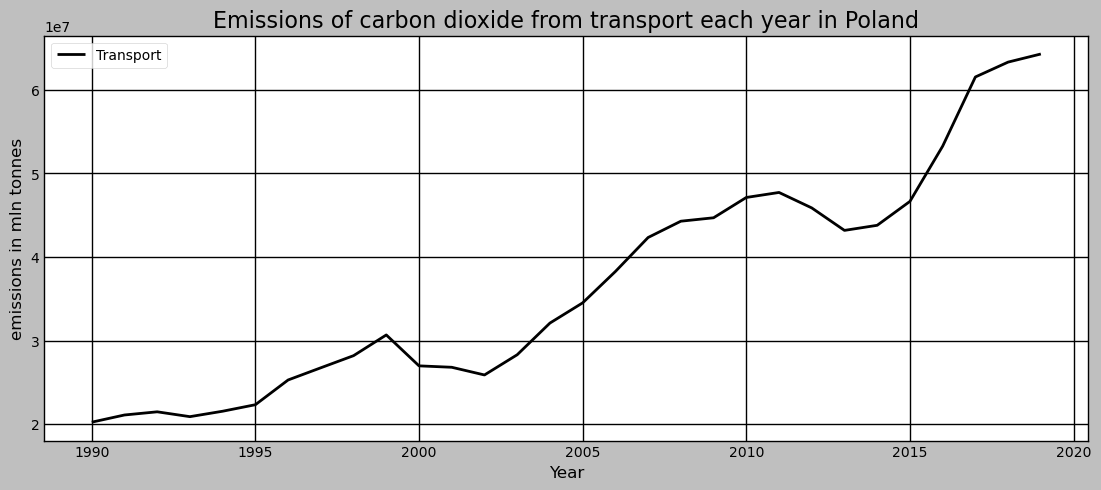

In [196]:
POLTransportByYear.plot(figsize=(12,5),
                        title='Emissions of carbon dioxide from transport each year in Poland',
                        ylabel=("emissions in mln tonnes"),
                        )
  

### Udział emisji CO2 według kontynentów 

In [219]:
co2 = pd.read_csv(r"C:\Programowanie\Jupyter\data\co2-emissions-transport.csv")

In [220]:
co22019 = co2[co2["Year"] == 2019]

In [221]:
co22019[co22019["Code"].isnull()]

,Entity,Code,Year,Transport
59,Africa,NaN,2019,3.558200e+08
269,Asia,NaN,2019,2.572370e+09
1822,Europe,NaN,2019,1.252220e+09
1852,European Union (27),NaN,2019,8.137100e+08
2332,High-income countries,NaN,2019,3.564720e+09
3102,Low-income countries,NaN,2019,6.103000e+07
3132,Lower-middle-income countries,NaN,2019,1.071370e+09
3956,North America,NaN,2019,2.145220e+09
4076,Oceania,NaN,2019,1.194800e+08
4976,South America,NaN,2019,3.998800e+08


In [222]:
co2Cont2019 = co22019[co22019['Entity'].isin(["Asia", "Europe", "North America", "South America", "Africa", "Oceania"])]

In [223]:
co2Cont2019

,Entity,Code,Year,Transport
59,Africa,NaN,2019,3.558200e+08
269,Asia,NaN,2019,2.572370e+09
1822,Europe,NaN,2019,1.252220e+09
3956,North America,NaN,2019,2.145220e+09
4076,Oceania,NaN,2019,1.194800e+08
4976,South America,NaN,2019,3.998800e+08


In [229]:
co2Cont2019 = co2Cont2019.loc[:, ["Entity", "Transport"]]

In [230]:
co2Cont2019.set_index("Entity", inplace = True)

In [231]:
co2Cont2019

,Transport
Entity,
Africa,3.558200e+08
Asia,2.572370e+09
Europe,1.252220e+09
North America,2.145220e+09
Oceania,1.194800e+08
South America,3.998800e+08


In [236]:
co2Cont2019.transpose()

Entity,Africa,Asia,Europe,North America,Oceania,South America
Transport,3.558200e+08,2.572370e+09,1.252220e+09,2.145220e+09,1.194800e+08,3.998800e+08


In [249]:
plt.style.use('seaborn-muted')

array([<AxesSubplot:>], dtype=object)

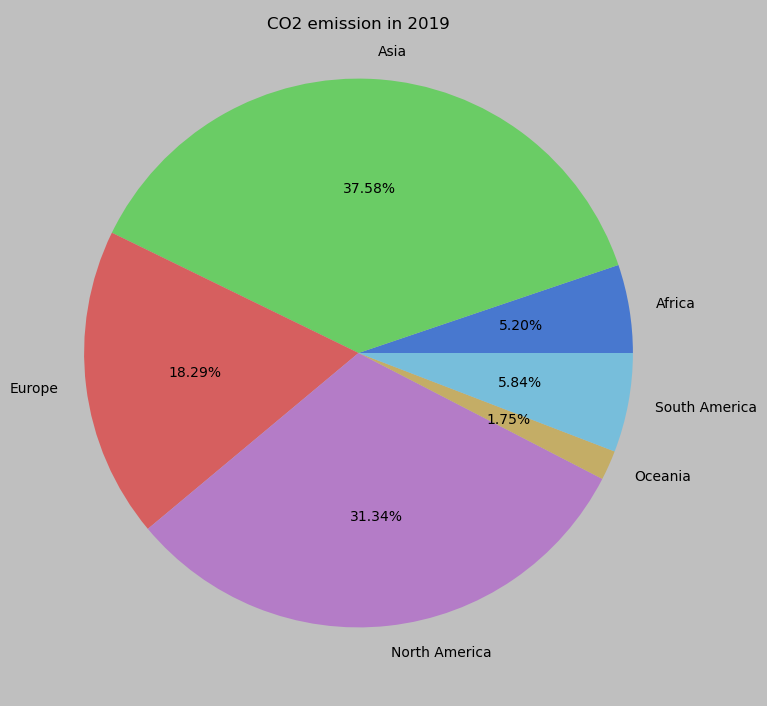

In [269]:
co2Cont2019.plot(kind = "pie", 
                 subplots = True,
                 figsize = (7, 7),
                 autopct='%.2f%%',
                 legend = False, 
                 title = "CO2 emission in 2019",
                 ylabel = "")